In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image

In [3]:
# modify the dir 

data_path_dir = 'E:\DataSets\CKPlus\cohn-kanade-images'
label_path_dir = 'E:\DataSets\CKPlus\FACS_labels\FACS'
landmark_path_dir = 'E:\DataSets\CKPlus\Landmarks\Landmarks'

In [4]:
def get_label(label_path_dir):
    au_label = []
    returned_label = []
    for names in os.listdir(label_path_dir):
        name = os.path.join(label_path_dir, names)
        for sequences in os.listdir(name):
            sequence = os.path.join(name, sequences)
            if os.listdir(sequence):
                temp = np.loadtxt(os.path.join(sequence, os.listdir(sequence)[-1]))
                if temp.ndim == 1:
                    au_label.append(temp.astype(np.int32))
                    returned_label.append(temp[0].astype(np.int32))
                elif temp.ndim == 2:
                    au_label.extend(temp.astype(np.int32))
                    returned_label.append(temp[:, 0].astype(np.int32))
                else:
                    print(temp)
                    raise Exception("label info error!")
    return au_label

In [5]:
au_label = get_label(label_path_dir)

# Label preprocess

AU1: 177
AU2: 117
AU4: 194
AU5: 102
AU6: 123
AU7: 121
AU9: 75
AU10: 21
AU11: 34
AU12: 131
AU13: 2
AU14: 37
AU15: 94
AU16: 24
AU17: 202
AU18: 9
AU20: 79
AU21: 3
AU22: 4
AU23: 60
AU24: 58
AU25: 324
AU26: 50
AU27: 81
AU28: 1
AU29: 2
AU30: 2
AU31: 3
AU34: 1
AU38: 29
AU39: 16
AU43: 9
AU44: 1
AU45: 17
AU54: 2
AU61: 1
AU62: 2
AU63: 2
AU64: 4


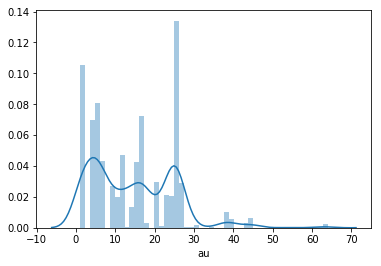

In [16]:
ll = []
for au in au_label:
    if au.ndim == 2:
        ll.extend(au[:, 0].astype(np.int32))
    elif au.ndim == 1:
        ll.append(au[0].astype(np.int32))
    else:
        print(au)
        raise Exception("label info error!")
label_set = set(ll)
reserved_set = set()
for label in label_set:
    print('AU'+str(label)+': '+str(ll.count(label)))

ll = pd.DataFrame(ll, columns=['au'])
sns.distplot(ll['au'], bins=50)

# AU image preprocess

In [17]:
def load_au_image_from_path(data_path_dir):
    # prepare au image
    au_image = []
    for names in os.listdir(data_path_dir):
        name = os.path.join(data_path_dir, names)
        for sequences in os.listdir(name):
            sequence = os.path.join(name, sequences)
            if os.path.isdir(sequence):
                if os.listdir(sequence):
                    au_image.append(
                        Image.open(os.path.join(sequence, os.listdir(sequence)[-1])).convert('RGB'))
    return au_image

def load_au_landmark_from_path(landmark_path_dir):
    au_landmark = []
    for names in os.listdir(landmark_path_dir):
        name = os.path.join(landmark_path_dir, names)
        for sequences in os.listdir(name):
            sequence = os.path.join(name, sequences)
            if os.listdir(sequence):
                au_landmark.append(np.loadtxt(os.path.join(sequence, os.listdir(sequence)[-1])))
    return au_landmark

def draw_landmark_point(img, landmark_path):
    img = Image.open(img)
    landmark = np.loadtxt(landmark_path)
    draw = ImageDraw.Draw(img)
    t = 1
    for point in landmark:
        draw.text(point.tolist(), str(t), fill=255)
        t += 1
    img.show()
    
def crop_au_img(img, landmark):
    width, height = img.size
    left = max(int(min(landmark[:, 0])) - 50, 0)
    right = min(width, int(max(landmark[:, 0] + 50)))
    top = max(int(min(landmark[:, 1])) - 100, 0)
    bottom = min(height, int(max(landmark[:, 1])) + 10)
    img = img.crop((left, top, right, bottom))
    return img

In [20]:
au_image = load_au_image_from_path(data_path_dir)
au_landmark = load_au_landmark_from_path(landmark_path_dir)

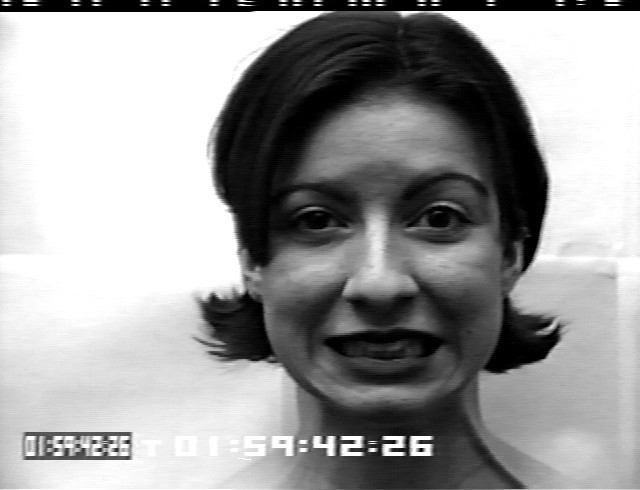

In [34]:
index = 1
au_image[index]

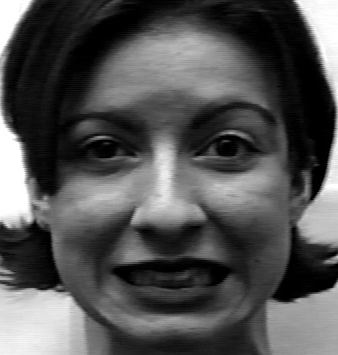

In [35]:
crop_au_img(au_image[index], au_landmark[index])